In [1]:
%reset -f

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
train_df = pd.read_csv("../Dataset/Train.csv",na_values=' ?')
test_df = pd.read_csv("../Dataset/Test.csv",na_values=' ?')

In [4]:
train_df =train_df.drop("ID",axis=1)
test_df = test_df.drop("ID",axis=1)

In [5]:
train_df

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1779.74,Below limit
1,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2170.60,Below limit
209495,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,...,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1029.57,Below limit
209496,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,791.61,Below limit
209497,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,NaN,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


In [6]:
print(train_df.shape)
print(test_df.shape)

(209499, 42)
(89786, 41)


<Figure size 1440x1440 with 0 Axes>

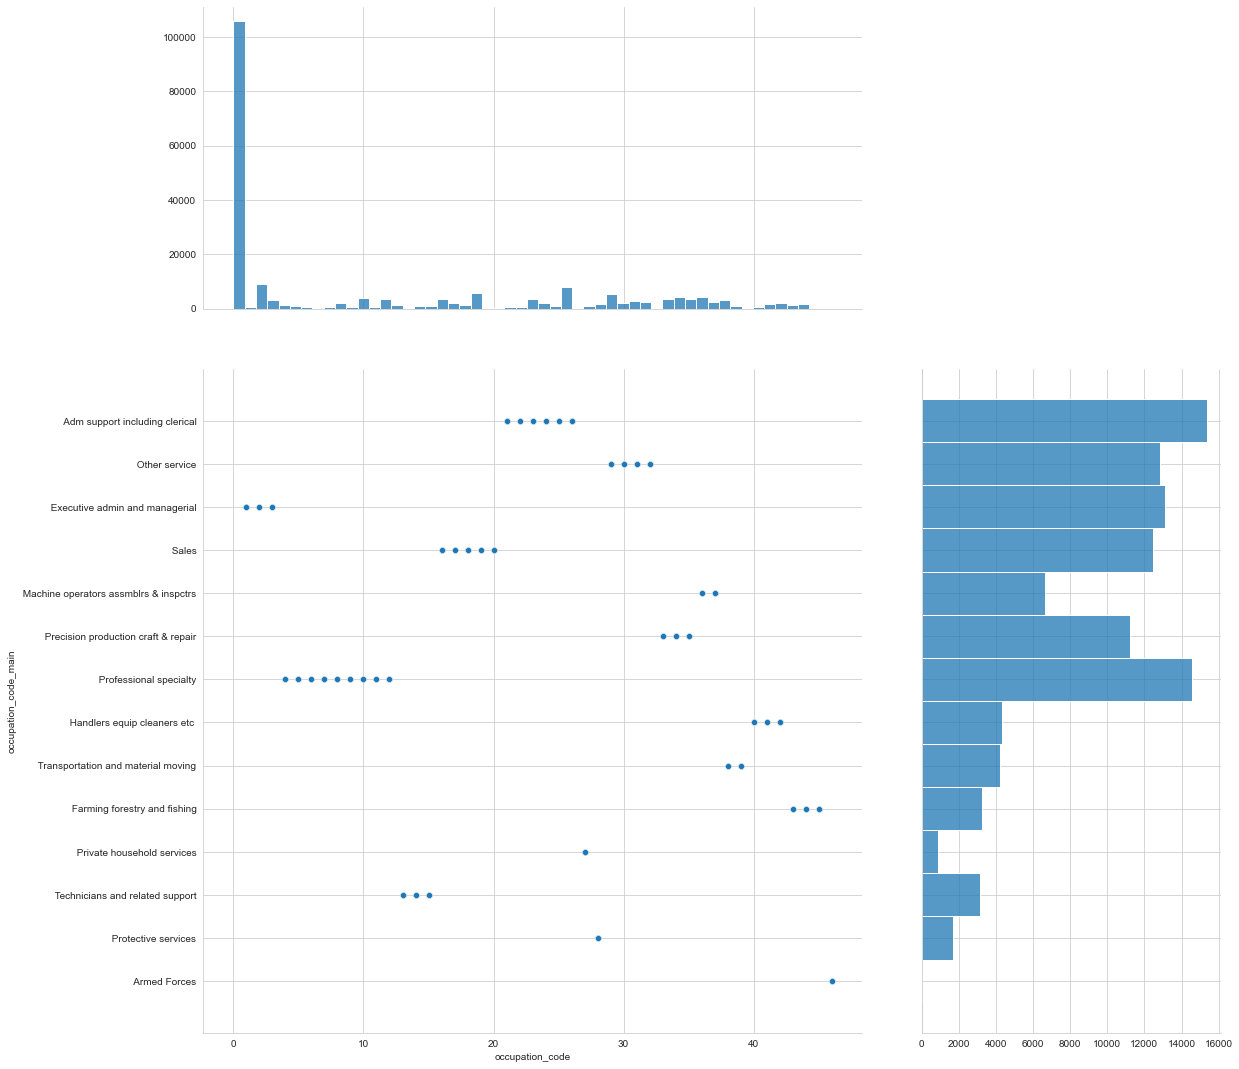

In [7]:
plt.figure(figsize=(20,20))
sns.jointplot(data=train_df, x="occupation_code", y="occupation_code_main",height=15, ratio=2, marginal_ticks=True)
plt.show()


In [8]:
train_df.industry_code.value_counts()

0     105694
33     18040
43      8739
4       6414
42      4934
45      4627
29      4419
37      4285
41      4088
32      3846
35      3474
39      3056
34      2862
44      2677
2       2298
11      1823
40      1779
50      1769
38      1736
47      1701
24      1580
19      1439
12      1399
30      1260
31      1238
25      1104
36      1028
9       1024
22       995
13       966
1        859
48       646
3        639
27       621
21       603
49       590
5        583
23       567
8        560
6        552
16       542
18       485
15       469
7        464
14       295
46       201
17       170
28       153
26       138
20        32
51        32
10         4
Name: industry_code, dtype: int64

In [9]:
train_df.industry_code_main.value_counts()

 Not in universe or children            105694
 Retail trade                            18040
 Manufacturing-durable goods              9336
 Education                                8739
 Manufacturing-nondurable goods           7232
 Construction                             6414
 Finance insurance and real estate        6336
 Business and repair services             6021
 Medical except hospital                  4934
 Public administration                    4706
 Other professional services              4627
 Transportation                           4419
 Hospital services                        4088
 Wholesale trade                          3846
 Agriculture                              3157
 Personal services except private HH      3056
 Social services                          2677
 Entertainment                            1779
 Communications                           1260
 Utilities and sanitary services          1238
 Private household services               1028
 Mining      

In [10]:
train_df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [11]:
train_df.nunique()

age                                   91
gender                                 2
education                             17
class                                  8
education_institute                    2
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
unemployment_reason                    5
employment_stat                        3
wage_per_hour                       1232
is_labor_union                         2
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
under_18_family                        4
veterans_admin_questionnaire           2
vet_benefit                            3
tax_status      

In [12]:
train_df.dtypes

age                                 int64
gender                             object
education                          object
class                              object
education_institute                object
marital_status                     object
race                               object
is_hispanic                        object
employment_commitment              object
unemployment_reason                object
employment_stat                     int64
wage_per_hour                       int64
is_labor_union                     object
working_week_per_year               int64
industry_code                       int64
industry_code_main                 object
occupation_code                     int64
occupation_code_main               object
total_employed                      int64
household_stat                     object
household_summary                  object
under_18_family                    object
veterans_admin_questionnaire       object
vet_benefit                       

In [13]:
train_df.isna().sum()

age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit                            0
tax_status      

In [14]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values', 2: 'dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


missing_values_table_df = missing_values_table(train_df)
missing_values_table_df

Your selected dataframe has 42 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values,dtype
veterans_admin_questionnaire,207415,99.0,object
unemployment_reason,202979,96.9,object
education_institute,196197,93.7,object
old_residence_state,193889,92.5,object
old_residence_reg,193148,92.2,object
migration_prev_sunbelt,193148,92.2,object
is_labor_union,189420,90.4,object
under_18_family,151654,72.4,object
migration_code_change_in_reg,106284,50.7,object
residence_1_year_ago,106284,50.7,object


In [15]:
test_df

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,NaN,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,NaN,...,El-Salvador,El-Salvador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1177.55
2,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,NaN,...,US,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898.55
3,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,NaN,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,NaN,...,US,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1933.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89781,5,Male,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,NaN,...,US,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,938.83
89782,81,Female,7th and 8th grade,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,...,US,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985.66
89783,65,Female,High school graduate,Federal government,NaN,Married-civilian spouse present,White,Other Spanish,Children or Armed Forces,NaN,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,552.74
89784,38,Female,High school graduate,Private,NaN,Married-A F spouse present,White,All other,Full-time schedules,NaN,...,US,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917.71


In [16]:
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)

3573


In [17]:
columns_drop=missing_values_table_df[missing_values_table_df['% of Total Values']>70].index.tolist()

In [18]:
train_df.drop(columns_drop,axis=1,inplace=True)
test_df.drop(columns_drop,axis=1,inplace=True)

In [19]:
missing_values_test_df = missing_values_table(test_df)
missing_values_test_df

Your selected dataframe has 33 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values,dtype
migration_code_change_in_msa,45597,50.8,object
migration_code_move_within_reg,45597,50.8,object
migration_code_change_in_reg,45597,50.8,object
residence_1_year_ago,45597,50.8,object
occupation_code_main,45273,50.4,object
class,45079,50.2,object
country_of_birth_father,2961,3.3,object
country_of_birth_mother,2675,3.0,object
country_of_birth_own,1490,1.7,object


In [20]:
missing_values_train_df = missing_values_table(train_df)
missing_values_train_df

Your selected dataframe has 34 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values,dtype
migration_code_change_in_msa,104302,50.7,object
migration_code_move_within_reg,104302,50.7,object
migration_code_change_in_reg,104302,50.7,object
residence_1_year_ago,104302,50.7,object
occupation_code_main,102139,49.6,object
class,101691,49.4,object
country_of_birth_father,7164,3.5,object
country_of_birth_mother,6500,3.2,object
country_of_birth_own,3663,1.8,object


In [21]:
categorical_columns=train_df.select_dtypes(include='O').T.index.tolist()
numerical_columns=train_df.select_dtypes(exclude='O').T.index.tolist()
train_df[categorical_columns]

,gender,education,class,marital_status,race,is_hispanic,employment_commitment,industry_code_main,occupation_code_main,household_stat,...,tax_status,citizenship,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,income_above_limit
0,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,Not in universe or children,NaN,Householder,...,Head of household,Native,US,US,US,NaN,NaN,NaN,NaN,Below limit
1,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,Not in universe or children,NaN,Nonfamily householder,...,Single,Native,US,US,US,unchanged,unchanged,unchanged,Same,Below limit
2,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,Hospital services,Adm support including clerical,Child 18+ never marr Not in a subfamily,...,Single,Native,US,US,US,unchanged,unchanged,unchanged,Same,Below limit
3,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,Not in universe or children,NaN,Child <18 never marr not in subfamily,...,Nonfiler,Native,US,India,India,unchanged,unchanged,unchanged,Same,Below limit
4,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,Not in universe or children,NaN,Spouse of householder,...,Joint both 65+,Native,US,US,US,NaN,NaN,NaN,NaN,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,Female,7th and 8th grade,NaN,Never married,White,All other,Not in labor force,Not in universe or children,NaN,Child <18 never marr not in subfamily,...,Nonfiler,Native,US,US,US,NaN,NaN,NaN,NaN,Below limit
209495,Male,Bachelors degree(BA AB BS),NaN,Married-civilian spouse present,White,All other,Not in labor force,Not in universe or children,NaN,Householder,...,Joint both 65+,Native,US,US,Canada,NaN,NaN,NaN,NaN,Below limit
209496,Female,Children,NaN,Never married,White,All other,Children or Armed Forces,Not in universe or children,NaN,Child <18 never marr not in subfamily,...,Nonfiler,Native,US,US,US,NaN,NaN,NaN,NaN,Below limit
209497,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,Wholesale trade,Handlers equip cleaners etc,Spouse of householder,...,Joint both under 65,Native,US,US,US,unchanged,unchanged,unchanged,Same,Below limit


**<h1>Feature Engineering</h1>**

In [22]:
train_df

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
2,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,...,94,US,US,US,unchanged,unchanged,unchanged,Same,1693.42,Below limit
3,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
4,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,Female,7th and 8th grade,NaN,Never married,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,2170.60,Below limit
209495,78,Male,Bachelors degree(BA AB BS),NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,95,US,US,Canada,NaN,NaN,NaN,NaN,1029.57,Below limit
209496,8,Female,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,791.61,Below limit
209497,26,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,700,...,94,US,US,US,unchanged,unchanged,unchanged,Same,3530.26,Below limit


In [23]:
def create_dict(l):
    mapping_dict = {l[i]:i+1 for i in range(0, len(l))}
    return mapping_dict

In [24]:
def preprocess_data(df,categorical_columns,missing_values_df):
    df.drop(['industry_code_main','occupation_code_main','household_stat'],inplace=True,axis=1)

    for col in ['industry_code_main','occupation_code_main','household_stat']:
        try:
            categorical_columns.remove(col)
        except ValueError:
            pass
        if col in missing_values_df.index.tolist():
            print (col)
            missing_values_df.drop(col,inplace=True)
    print(missing_values_df.index.tolist())
    for col in missing_values_df.index.tolist():
           print(f"for col{col} mode is {df[col].mode()[0]} ")
           df[col] = df[col].fillna(df[col].mode()[0])
           test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

    try:
            categorical_columns.remove('income_above_limit')
    except ValueError:
            pass

    df[categorical_columns] = df[categorical_columns].apply(lambda x:x.str.strip())

    own=df['country_of_birth_own'].value_counts().index.tolist()
    mapping_dict=create_dict(own)

    df.replace({'country_of_birth_own': mapping_dict},inplace=True)
    df.replace({'country_of_birth_mother': mapping_dict},inplace=True)
    df.replace({'country_of_birth_father': mapping_dict},inplace=True)


    df['household_summary'].replace(['Householder','Nonrelative of householder','Group Quarters- Secondary individual'],'nonfamily household',inplace=True)
    df['household_summary'].replace(['Child under 18 never married','Spouse of householder','Child 18 or older','Other relative of householder','Child under 18 ever married'],'Family household',inplace=True)


    df['employment_commitment'].replace(['Full-time schedules'],'Labor-Full-time',inplace=True)
    df['employment_commitment'].replace(['Not in labor force','Unemployed full-time','Unemployed part- time'],'Unemployed',inplace=True)
    df['employment_commitment'].replace(['PT for non-econ reasons usually FT','PT for econ reasons usually FT','PT for econ reasons usually PT'],'Labor-Part-time',inplace=True)


    df['tax_status'].replace(['Joint both under 65','Joint one under 65 & one 65+','Joint both 65+'],'Joint filer',inplace=True)
    df['tax_status'].replace(['Single','Head of household'],'Single filer',inplace=True)


    df['class'].replace(['Never worked','Without pay'],'Not Working',inplace=True)
    df['class'].replace(['Self-employed-incorporated','Self-employed-not incorporated'],'Private',inplace=True)
    df['class'].replace(['Local government','State government','Federal government'],'Government',inplace=True)


    # plt.figure(figsize=(20,20))
    # sns.countplot(df['age'],hue=df['education'])
    # plt.show()

    df['education'].replace(['Less than 1st grade','Children'],'Preschool',inplace=True)
    df['education'].replace(['1st 2nd 3rd or 4th grade','5th or 6th grade'],'Primary School',inplace=True)
    df['education'].replace(['7th and 8th grade','10th grade','11th grade','9th grade','12th grade no diploma','High school graduate'],'Secondary School',inplace=True)
    df['education'].replace(['Some college but no degree','Bachelors degree(BA AB BS)','Masters degree(MA MS MEng MEd MSW MBA)','Associates degree-occup /vocational','Associates degree-academic program','Prof school degree (MD DDS DVM LLB JD)','Doctorate degree(PhD EdD)'],'Post Secondary School',inplace=True)


    df['marital_status'].replace(['Married-civilian spouse present','Married-A F spouse present','Married-spouse absent','Separated'],'Married',inplace=True)
    df['marital_status'].replace(['Never married','Divorced','Widowed'],'Single',inplace=True) #Divorced and widoowed can be put as seprate category


    df['is_hispanic'].replace(['NA','Do not know'],df['is_hispanic'].mode()[0],inplace=True)
    is_hispanic_values=df['is_hispanic'].value_counts().index.tolist()
    for value in is_hispanic_values:
        if value !='All other':
            df['is_hispanic'].replace(value,'Hispanic',inplace=True)

    citizenship_values= df['citizenship'].value_counts().index.tolist()
    for value in citizenship_values:
        if 'Native' in value:
            df['citizenship'].replace(value,'Native',inplace=True)
        else:
            df['citizenship'].replace(value,'Foreign',inplace=True)


    col_values= df['migration_code_change_in_reg'].value_counts().index.tolist()
    for value in col_values:
        if value !='unchanged':
            df['migration_code_change_in_reg'].replace(value,'changed',inplace=True)


    col_values= df['migration_code_move_within_reg'].value_counts().index.tolist()
    for value in col_values:
        if value !='unchanged':
            df['migration_code_move_within_reg'].replace(value,'changed',inplace=True)


    col_values= df['migration_code_change_in_msa'].value_counts().index.tolist()
    for value in col_values:
        if value !='unchanged':
            df['migration_code_change_in_msa'].replace(value,'changed',inplace=True)

    return df

In [25]:
train_df=preprocess_data(train_df,categorical_columns,missing_values_train_df)
test_df=preprocess_data(test_df,categorical_columns,missing_values_train_df)

occupation_code_main
['migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'class', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_own']
for colmigration_code_change_in_msa mode is unchanged 
for colmigration_code_move_within_reg mode is unchanged 
for colmigration_code_change_in_reg mode is unchanged 
for colresidence_1_year_ago mode is Same 
for colclass mode is  Private 
for colcountry_of_birth_father mode is US 
for colcountry_of_birth_mother mode is US 
for colcountry_of_birth_own mode is US 
['migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'class', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_own']
for colmigration_code_change_in_msa mode is unchanged 
for colmigration_code_move_within_reg mode is unchanged 
for colmigration_code_change_in_reg mode is unchanged 
for colresidence_1_year_ag

In [26]:
for col in categorical_columns:
        print(train_df[col].value_counts())

Female    107069
Male       98857
Name: gender, dtype: int64
Secondary School         82922
Post Secondary School    70458
Preschool                47090
Primary School            5456
Name: education, dtype: int64
Private        189693
Government      15618
Not Working       615
Name: class, dtype: int64
Single     111662
Married     94264
Name: marital_status, dtype: int64
White                          172407
Black                           21164
Asian or Pacific Islander        6037
Other                            3914
Amer Indian Aleut or Eskimo      2404
Name: race, dtype: int64
All other    178170
Hispanic      27756
Name: is_hispanic, dtype: int64
Children or Armed Forces    126295
Labor-Full-time              42777
Unemployed                   31522
Labor-Part-time               5332
Name: employment_commitment, dtype: int64
Family household       118323
nonfamily household     87603
Name: household_summary, dtype: int64
Joint filer     83496
Nonfiler        75134
Single file

<AxesSubplot:xlabel='migration_code_change_in_msa', ylabel='count'>

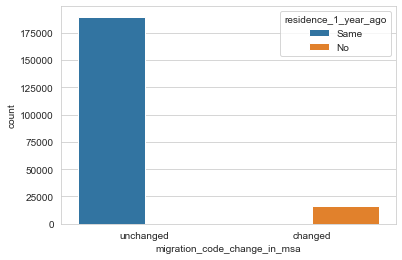

In [27]:
sns.countplot(train_df['migration_code_change_in_msa'],hue=train_df['residence_1_year_ago'])

<AxesSubplot:xlabel='residence_1_year_ago', ylabel='count'>

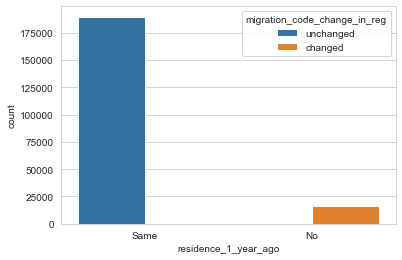

In [28]:
sns.countplot(train_df['residence_1_year_ago'],hue=train_df['migration_code_change_in_reg'])

In [29]:
from sklearn import preprocessing
def data_encoding(df):
    df.drop(['migration_code_change_in_reg','migration_code_move_within_reg','migration_code_change_in_msa'],inplace=True,axis=1)

    ordinal=['education']
    nominal=['marital_status', 'race','employment_commitment', 'household_summary', 'tax_status', 'citizenship']
    binary=['gender', 'class','is_hispanic','residence_1_year_ago']

    oe=preprocessing.OrdinalEncoder(dtype= 'int64')
    for col in ordinal:
         df[col]=oe.fit_transform(np.array(df[col]).reshape(-1, 1))
    # print(oe.categories_)

    le=preprocessing.LabelEncoder()
    for col in binary:
         df[col]=le.fit_transform(df[col])
    # print(oe.categories_)

    new_df = pd.get_dummies(df,drop_first=False,columns=nominal,dtype= 'int64')
    new_df.reset_index(drop=True,inplace=True)
    return new_df

In [30]:
# from scipy.stats import chi2_contingency
# x=len(categorical_columns)
# factors_paired = [(i,j) for i in categorical_columns for j in categorical_columns]
# chi2, p_values =[], []
# for f in factors_paired:
#     if f[0] != f[1]:
#         chitest = chi2_contingency(pd.crosstab(train_df[f[0]], train_df[f[1]]))
#         chi2.append(chitest[0])
#         p_values.append(chitest[1])
#         if chitest[1] < 0.05 and chitest[1]!=0:
#             print(f[0],f[1],chitest[1],chitest[2])
#     else:
#         chi2.append(0)
#         p_values.append(0)
#
# p1 = np.array(p_values).reshape(x,x)
# p1 = pd.DataFrame(p1, index=categorical_columns, columns=categorical_columns)
# p1

In [31]:
train_df= data_encoding(train_df)
test_df =data_encoding(test_df)

In [32]:
# train_df_iqr.shape

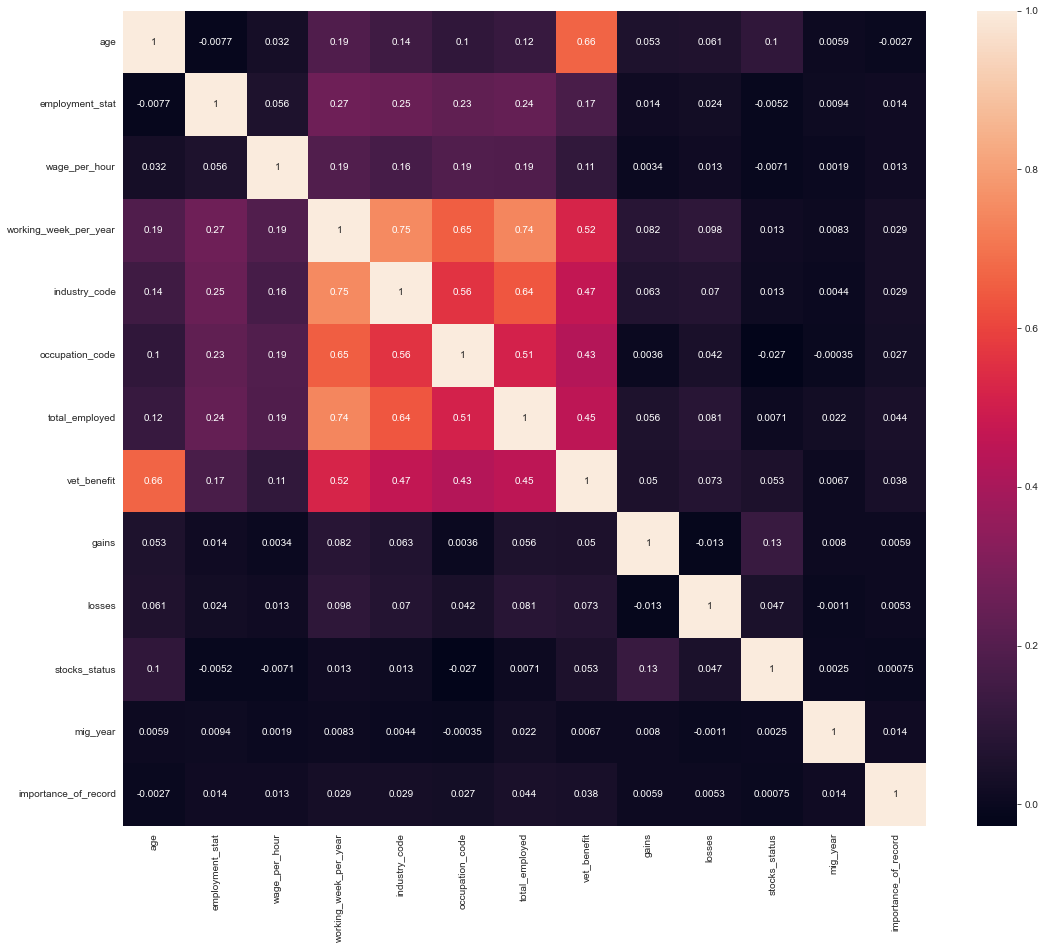

In [33]:
plt.figure(figsize=(18,15))
sns.heatmap(train_df[numerical_columns].corr(),annot=True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X= train_df.drop("income_above_limit",axis=1)
y = train_df["income_above_limit"].map({'Above limit':1,'Below limit':0})


In [35]:
y.value_counts()

0    192928
1     12998
Name: income_above_limit, dtype: int64

In [36]:
from collections import Counter

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=1)
def calc_class_percentage(y_train):
    counter = Counter(y_train)
    print("=============================")
    for k,v in counter.items():
        per = 100*v/len(y_train)
        print(f"Class= {k}, n={v} ({per:.2f}%)")

In [37]:
from imblearn.over_sampling import SMOTE

calc_class_percentage(y_train)
smote = SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)
calc_class_percentage(y_train)

Class= 0, n=129280 (93.70%)
Class= 1, n=8690 (6.30%)
Class= 0, n=129280 (50.00%)
Class= 1, n=129280 (50.00%)


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, \
    f1_score

def plot_confusion_perf(y_test,y_pred,model):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    Accuracy  =  accuracy_score(y_test, y_pred)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
    print(f"Accuracy Score: {Accuracy}")
    print(f"Precision: {Precision}")
    print(f"Recall: {Recall}")
    print(f"F1_score: {F1_score}")
    return disp

In [39]:
def save_submission(model,model_name,test_df):
    subdf = pd.read_csv('../Dataset/SampleSubmission.csv')
    subdf['income_above_limit'] = model.predict(test_df)
    subdf.to_csv('../Submission/'+model_name+'.csv',index=False)
    print(subdf['income_above_limit'].value_counts(normalize=True))

Accuracy Score: 0.8017099299546766
Precision: 0.939245022832643
Recall: 0.8017099299546766
F1_score: 0.8493236434925967


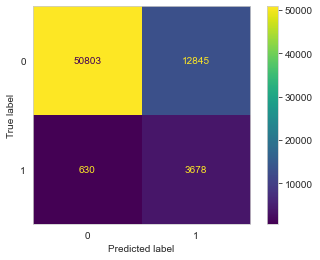

0    0.760642
1    0.239358
Name: income_above_limit, dtype: float64


In [40]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred= lr.predict(X_test)
disp =plot_confusion_perf(y_test,y_pred,lr)
disp.plot()
plt.grid(False)
plt.show()
save_submission(lr,'lr',test_df)

Accuracy Score: 0.946229913473424
Precision: 0.9420110516896089
Recall: 0.946229913473424
F1_score: 0.9437601908722326


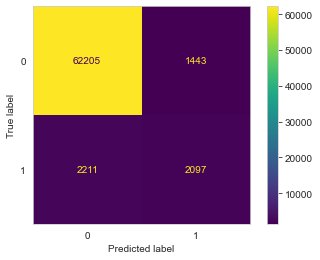

0    0.949569
1    0.050431
Name: income_above_limit, dtype: float64


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,rf)
disp.plot()
plt.grid(False)
plt.show()

save_submission(rf,'rf',test_df)

Accuracy Score: 0.9363264465242216
Precision: 0.9413333189952989
Recall: 0.9363264465242216
F1_score: 0.9385977338635241


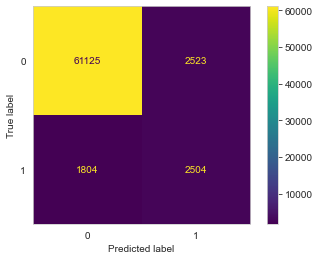

0    0.928864
1    0.071136
Name: income_above_limit, dtype: float64


In [42]:
from sklearn.ensemble import AdaBoostClassifier

ab= AdaBoostClassifier(n_estimators=200)
ab.fit(X_train,y_train)
y_pred =ab.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,ab)
disp.plot()
plt.grid(False)
plt.show()
save_submission(ab,'ab',test_df)

Accuracy Score: 0.9347224674789569
Precision: 0.9411196044594086
Recall: 0.9347224674789569
F1_score: 0.9375712663408846


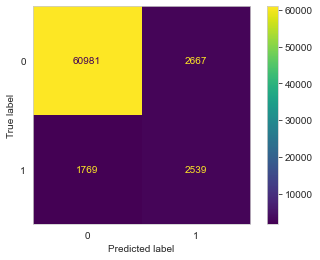

0    0.925935
1    0.074065
Name: income_above_limit, dtype: float64


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gtb= GradientBoostingClassifier(n_estimators=200)
gtb.fit(X_train,y_train)
y_pred =gtb.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,gtb)
disp.plot()
plt.grid(False)
plt.show()
save_submission(gtb,'gtb',test_df)

Accuracy Score: 0.9198304785449408
Precision: 0.9296082752683251
Recall: 0.9198304785449408
F1_score: 0.9242379622365954


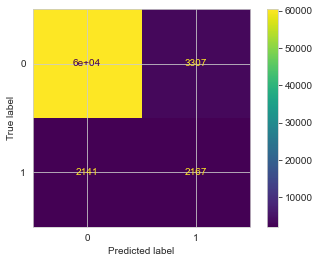

0    0.921614
1    0.078386
Name: income_above_limit, dtype: float64


In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,dtc)
disp.plot()
plt.show()
save_submission(dtc,'dtc',test_df)

Accuracy Score: 0.9442874801342045
Precision: 0.9382133308082772
Recall: 0.9442874801342045
F1_score: 0.9405216655080167


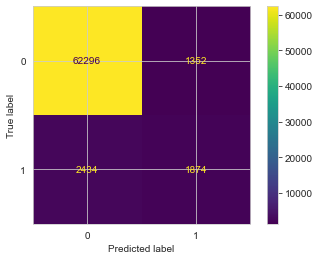

0    0.953612
1    0.046388
Name: income_above_limit, dtype: float64


In [45]:
from sklearn.ensemble import ExtraTreesClassifier

etc=ExtraTreesClassifier(random_state=0)
etc.fit(X_train,y_train)
y_pred= etc.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,etc)
disp.plot()
plt.show()
save_submission(etc,'etc',test_df)

In [46]:
# X= train_df.drop("income_above_limit",axis=1)
# Y = train_df["income_above_limit"]
# Q1=X.quantile(0.25)
# Q3 =X.quantile(0.75)
# IQR= Q3-Q1
#
# train_df_iqr=train_df[~((train_df<Q1-1.5*IQR)|(train_df>Q3+1.5*IQR)).any(axis=1)]
# train_df_iqr2=train_df[((train_df<Q1-1.5*IQR)|(train_df>Q3+1.5*IQR)).any(axis=1)]
# # train_df_iqr.plot(kind="box",subplots=True,sharex=False,layout=(6,3),figsize=(18,27))
# # plt.show()
# train_df_iqr2['income_above_limit'].value_counts()
# train_df_iqr['income_above_limit'].value_counts()

In [47]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import KFold, GridSearchCV, HalvingGridSearchCV
%time
# gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 2000, 200),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini','entropy'],
    'max_depth': [5,11],
    'min_samples_split': [2,4,8,10],
    'min_samples_leaf': [1,2,3,4],
    'class_weight': ['balanced', None],
    'bootstrap': [True, False]
}


rf_estimator = RandomForestClassifier()

# gsearch = GridSearchCV(
#     estimator= rf_estimator,
#     param_grid= params,
#     scoring='f1_weighted',
#     n_jobs=-1,
#     cv=gkf,
#     verbose=3,
# )

gsearch = HalvingGridSearchCV(
    estimator= rf_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=3,
    factor=3,
    cv=3
)

rf_model = gsearch.fit(X=X_train, y=y_train)


CPU times: total: 0 ns
Wall time: 0 ns
n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 118
max_resources_: 258560
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 5120
n_resources: 118
Fitting 3 folds for each of 5120 candidates, totalling 15360 fits


In [56]:
rf_model.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=300)